#  Mini Project

Dataset Fosil Fuel

#### Read me

Per Country CO2 Emissions from fossil-fuels annually since 1751 till 2014.

##### Source: 
Boden, T.A., G. Marland, and R.J. Andres. 2013. Global, Regional, and National Fossil-Fuel CO2 Emissions. Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy, Oak Ridge, Tenn., U.S.A. doi 10.3334/CDIAC/00001_V2013

http://datahub.io/core/co2-fossil-by-nation#data-cli

In [126]:
%matplotlib inline
import pandas as pd
import re
from lxml import etree 
from bz2file import BZ2File
import codecs
import nltk
from collections import defaultdict
from  itertools import combinations  # ideal for creating all possible pairs that one can make out of a set
from __future__ import division
from math import sqrt 
import seaborn as sns

# 1 | Dutch Solid Fuel Use 

Show the movement of fuel use during the enitre period measured for the Netherlands.

In [127]:
raw = pd.read_csv('fossil-fuel-co2-emissions-by-nation_csv.csv')
raw.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


In [128]:
raw.Country.value_counts().head()

UNITED KINGDOM               264
CANADA                       230
POLAND                       215
UNITED STATES OF AMERICA     215
FRANCE (INCLUDING MONACO)    207
Name: Country, dtype: int64

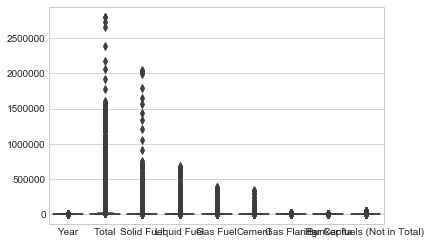

In [263]:
# Boxplot
sns.boxplot(data=raw)
sns.set_style("whitegrid")

In [264]:
per_year = raw.groupby(['Country','Year'])['Solid Fuel'].max()

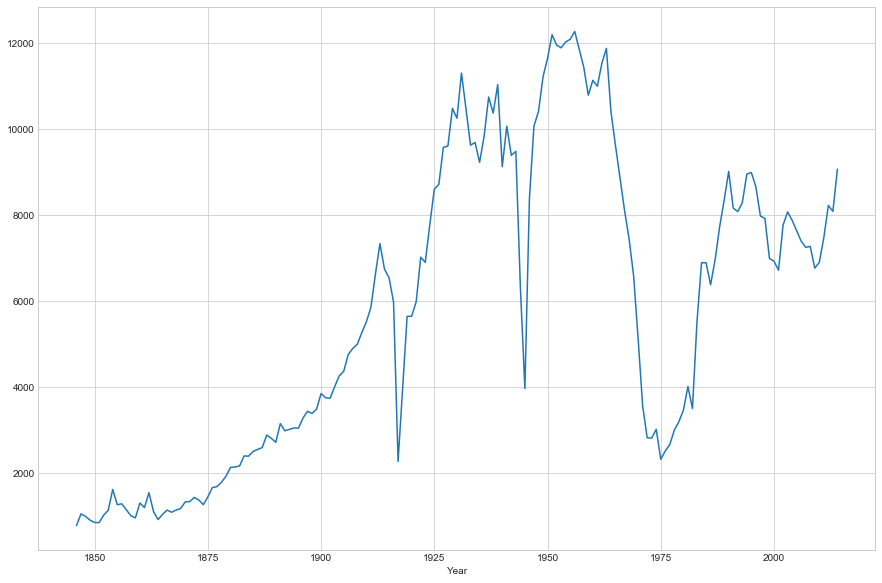

In [265]:
per_year['NETHERLANDS'].plot(figsize=(15,10))

# 2 | Solid Fuel Use In Perspective

In [266]:
a = per_year['NETHERLANDS'].to_frame()
b = per_year['UNITED STATES OF AMERICA'].to_frame()
c = per_year['CHINA (MAINLAND)'].to_frame()
joint = a.join(b ,rsuffix=' Netherlands',lsuffix=' United States of America')
joint = joint.join(c,rsuffix=' China',lsuffix=' China')
joint.columns = ['Netherlands','America','China']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


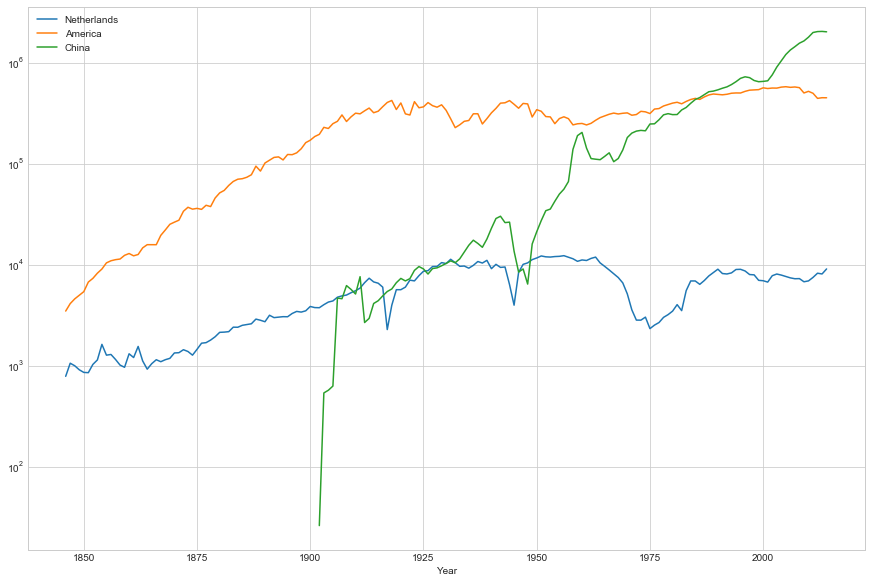

In [267]:
joint.plot(figsize=(15,10),logy=True)

# 3 | Highest Emision Per Capita 

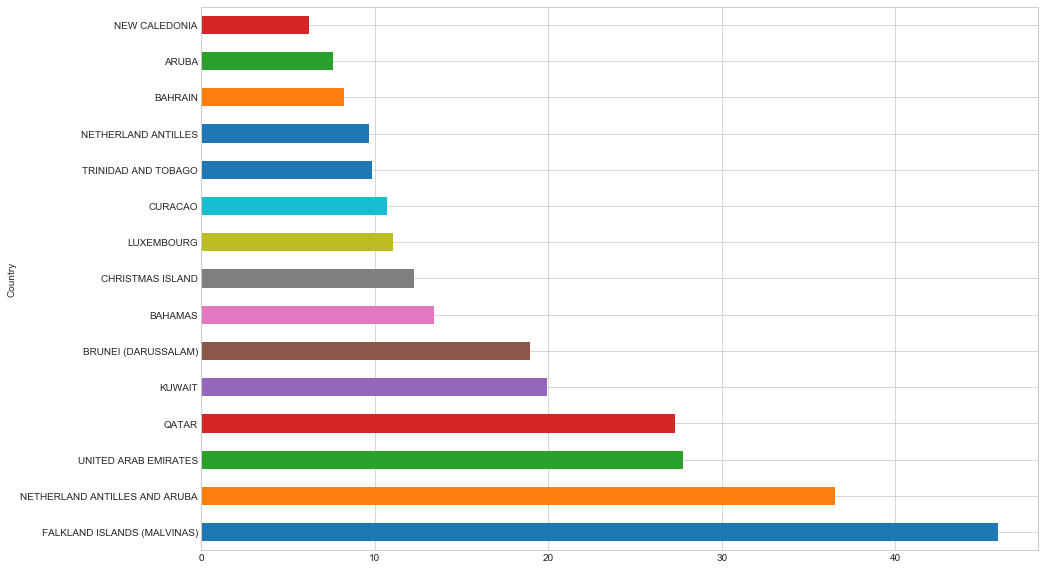

In [268]:
per_capita = raw.groupby(['Country','Year'])['Per Capita'].max()
per_capita.max(level=0).sort_values(ascending=False).head(15).plot(kind='barh',figsize=(15,10))

In [269]:
per_capita.max(level=0).sort_values(ascending=False).head(15).plot

#### Bron WikiPedia | Falkland Islands

In 1995 werden de eerste vergunningen afgegeven voor het zoeken van aardolie en aardgas in de territoriale wateren. In de eerste jaren werd weinig olie aangetroffen, maar in mei 2010 werd de eerste grote ontdekking gedaan.[7] Het Sea Lion olieveld ligt zo’n 220 kilometer ten noorden van de eilanden in een waterdiepte van 450 meter.[8] De eigenaren van het veld zijn PremierOil met 60% van de aandelen en de resterende aandelen zijn in bezit van Rockhopper.[8] Productie uit het veld wordt pas verwacht in 2020.[9] In het veld zit ongeveer 400 miljoen vaten winbare olie, voldoende om een dagelijkse productie van 60.000 vaten te realiseren.[9] De gerelateerde belastinginkomsten voor de Falklandeilanden worden getaxeerd op 2,5 miljard dollar voor de eerste 15 jaar.[9]

### BUNKER FUELS

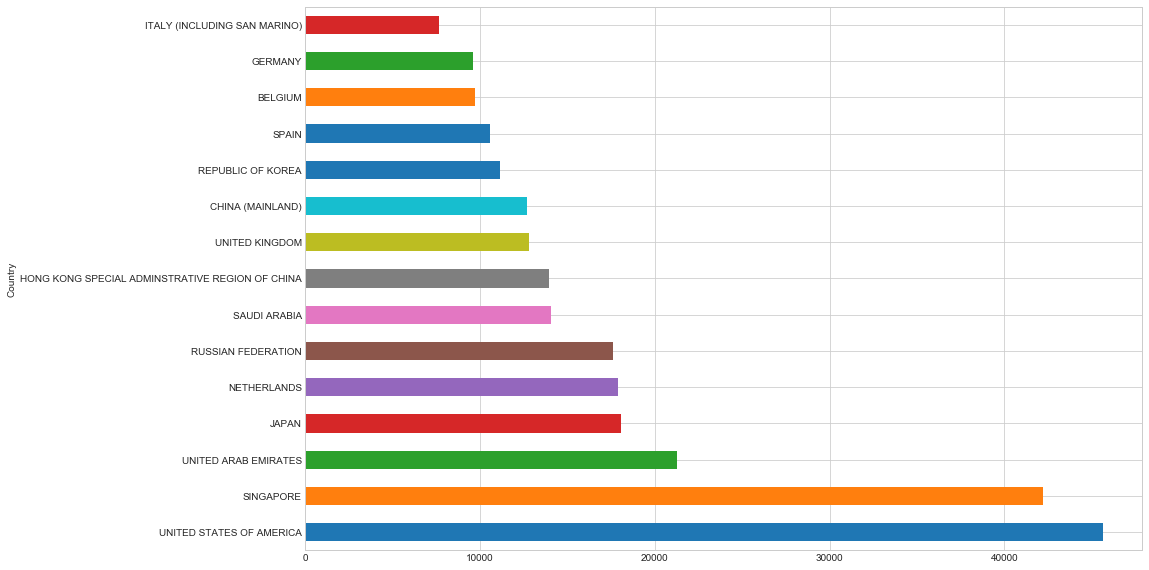

In [270]:
per_capita = raw.groupby(['Country','Year'])["Bunker fuels (Not in Total)"].max()
per_capita.max(level=0).sort_values(ascending=False).head(15).plot(kind='barh',figsize=(15,10))

# 4 | War Fuel

In [271]:
war = raw[(raw['Year'] >= 1940) & (raw['Year'] <= 1945)]
per_war = war.groupby(['Country','Year'])['Total'].max()

https://python-graph-gallery.com/122-multiple-lines-chart/

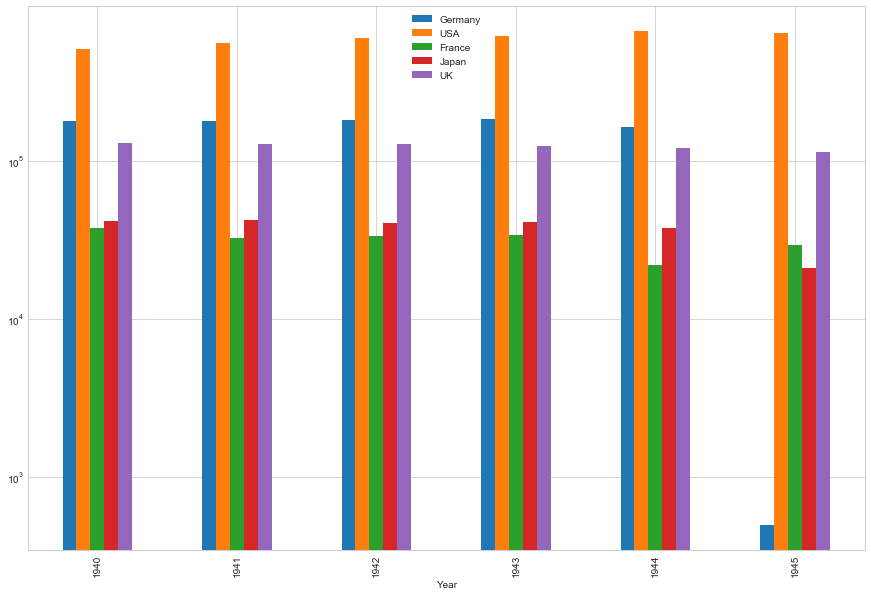

In [272]:
a = per_war['GERMANY'].to_frame()
b = per_war['UNITED STATES OF AMERICA'].to_frame()
c = per_war['FRANCE (INCLUDING MONACO)'].to_frame()
d = per_war['JAPAN (EXCLUDING THE RUYUKU ISLANDS)'].to_frame()
e = per_war['UNITED KINGDOM'].to_frame()

joint = a.join(b ,rsuffix=' USA',lsuffix=' Germany')
joint = joint.join(c,rsuffix=' France',lsuffix=' France')
joint = joint.join(d,rsuffix=' Russia',lsuffix=' Russia')
joint = joint.join(e,rsuffix=' UK',lsuffix=' UK')

joint.columns = ['Germany','USA','France','Japan','UK']
joint.plot(kind='bar',figsize=(15,10),logy=True)

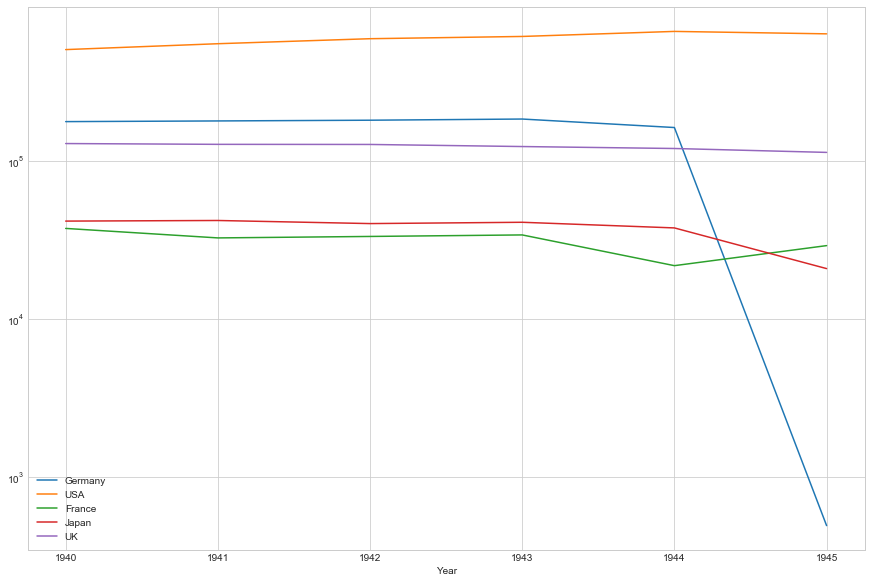

In [273]:
joint.plot(figsize=(15,10),logy=True)

In [274]:
pop = pd.read_csv('population.csv')
pop['Upper C'] = pop['Country Name'].str.upper()
pop = pop.rename(columns = {'Upper C':'Country'})


df = pd.merge(raw, pop,  how='inner', left_on=['Country','Year'], right_on = ['Country','Year'])
df

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),Country Name,Country Code,Value
0,1960,AFGHANISTAN,113,35,74,0,5,0,0.01,0,Afghanistan,AFG,8.996351e+06
1,1960,ALBANIA,552,89,430,23,10,0,0.34,0,Albania,ALB,1.608800e+06
2,1960,ALGERIA,1680,343,1193,0,144,0,0.16,438,Algeria,DZA,1.112489e+07
3,1960,ANGOLA,150,34,95,0,22,0,0.03,41,Angola,AGO,5.643182e+06
4,1960,ARGENTINA,13312,1066,11242,645,359,0,0.65,211,Argentina,ARG,2.061908e+07
5,1960,AUSTRALIA,24053,16083,7590,0,380,0,2.34,1219,Australia,AUS,1.027648e+07
6,1960,AUSTRIA,8405,4926,2297,797,385,0,1.19,1,Austria,AUT,7.047539e+06
7,1960,BAHRAIN,157,0,157,0,0,0,0.97,605,Bahrain,BHR,1.624270e+05
8,1960,BARBADOS,47,1,45,1,0,0,0.20,3,Barbados,BRB,2.309390e+05
9,1960,BELGIUM,24816,18533,5668,17,597,0,2.71,657,Belgium,BEL,9.153489e+06


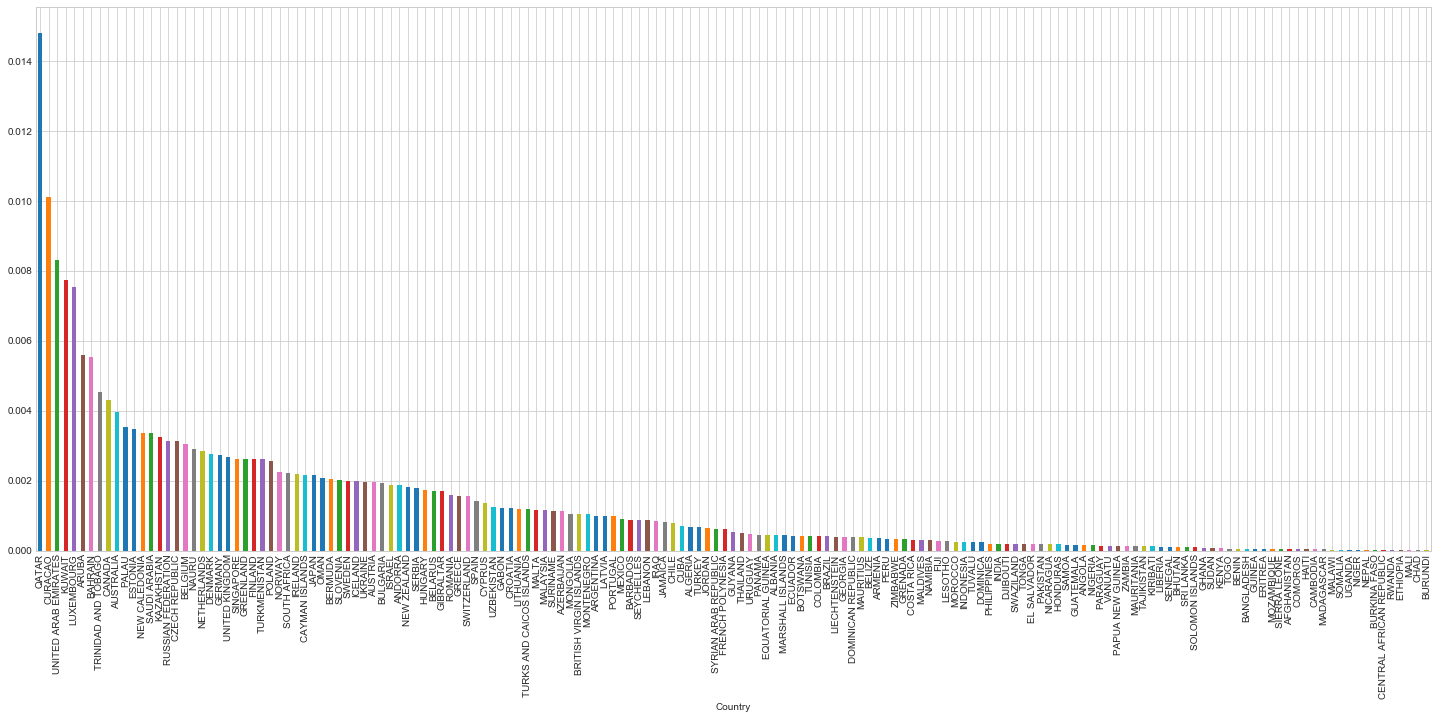

In [288]:
pop_growth = df.groupby(['Country','Year'])['Value'].max()
fuel_growth = df.groupby(['Country','Year'])['Total'].max()

merged = pd.merge(pop_growth.reset_index(), fuel_growth.reset_index(),left_on=['Country','Year'], right_on = ['Country','Year'])
merged['Avg_Fuel'] = merged.Total / merged.Value
groep = merged.groupby(['Country','Year'])['Avg_Fuel'].mean()
groep.mean(level=0).sort_values(ascending=False).plot(kind='bar',figsize=(25,10))

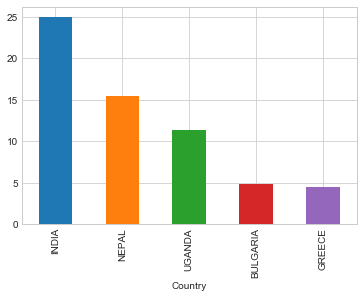

In [276]:
top5_growth = pop_growth.pct_change().mean(level=0).sort_values(ascending=False).head()
top5.plot(kind='bar')

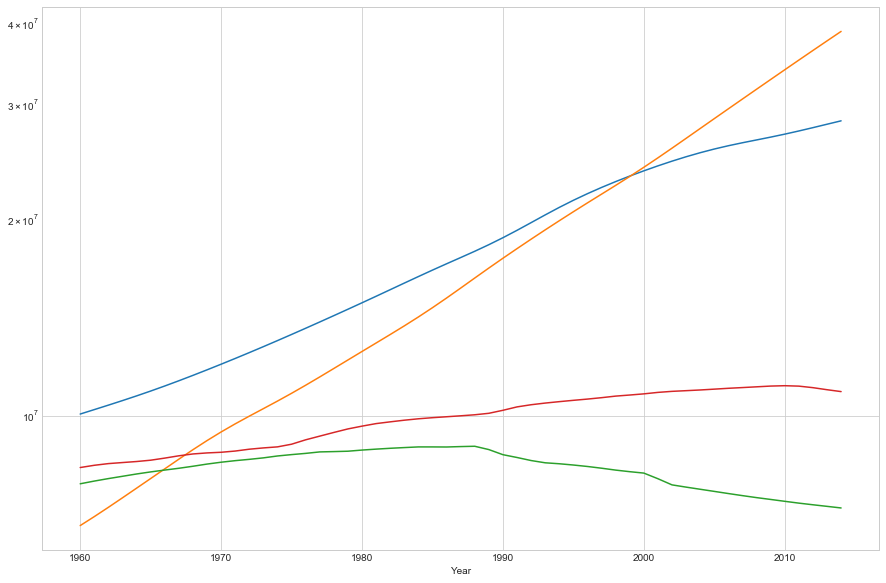

In [277]:
for i in top5_growth.index[1:]:
        pop_growth[i].plot(logy=True,figsize=(15,10))
        

### Bulgaria falling of a cliff:

Bulgaria has the fastest declining population in the world. From a peak of nearly 9 million around the time of the communist fall in 1990 Bulgaria’s population is 7 million today and projected to fall to around 5 million over the next generation. Entire villages have been depopulated, especially in the poorer Northern region.


http://www.bbc.com/news/world-europe-41109572

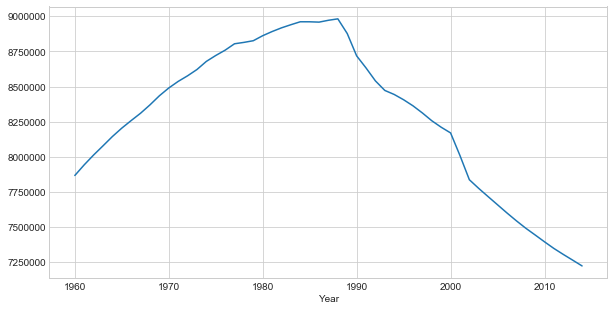

In [278]:
bulgaria_growth = pop_growth["BULGARIA"].plot(figsize=(10,5))

In [287]:
pop_growth["BULGARIA"][:5]

Year
1960    7867374.0
1961    7943118.0
1962    8012946.0
1963    8078145.0
1964    8144340.0
Name: Value, dtype: float64

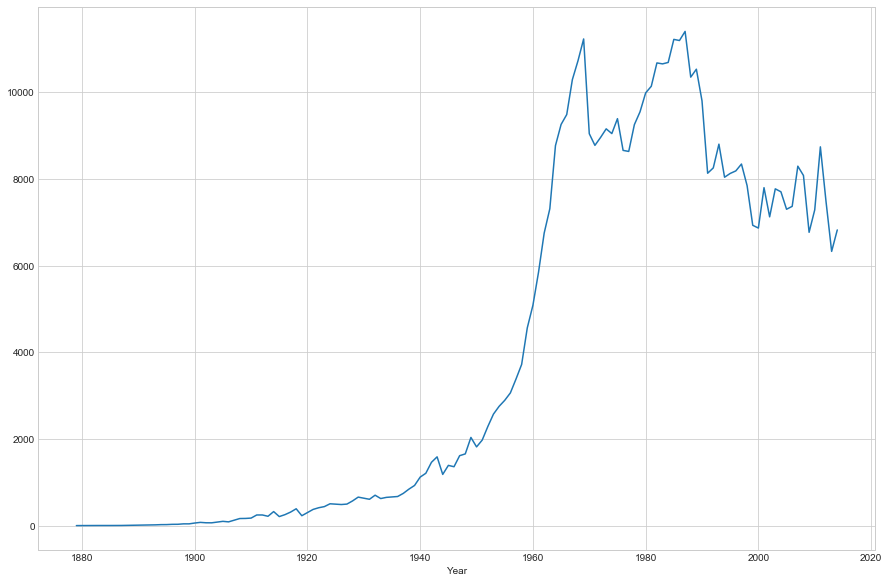

In [289]:
per_year['BULGARIA'].plot(figsize=(15,10))

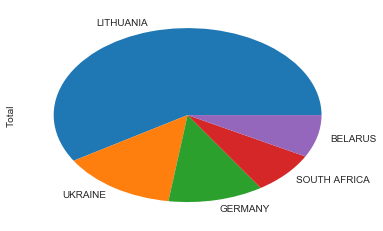

In [279]:
top5 = fuel_growth.pct_change().mean(level=0).sort_values(ascending=False).head()
top5.plot(kind='pie')

In [280]:
fuel_capita_growth = df.groupby(['Country','Year'])['Per Capita'].max()

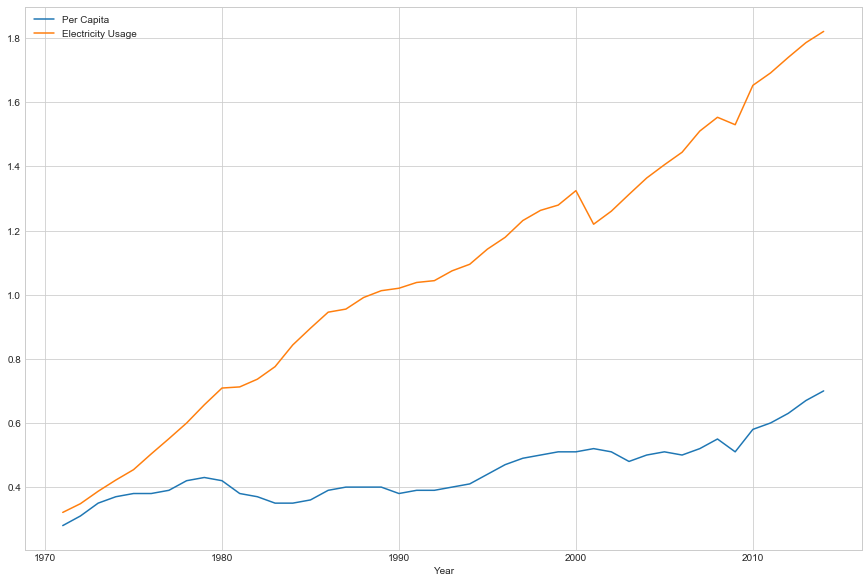

In [281]:
elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2.csv')

a= elec[elec['Country Name'] =='Brazil'].mean(axis=0).to_frame()
b= fuel_capita_growth['BRAZIL'].to_frame()
a.index.name = 'Year'
b.index.name = 'Year'
a.columns = ['Total Elec']
b = b.dropna()
a = a.dropna()
a['Year'] = a.index
b['Year'] = b.index
b = b.astype(float)
a = a.astype(float)
df_elec = pd.merge(a,b,how='inner')
df_elec['Electricity Usage'] = df_elec['Total Elec'] * 0.0007
df_elec = df_elec.iloc[:,1:4]
df_elec.set_index('Year').plot(figsize=(15,10))


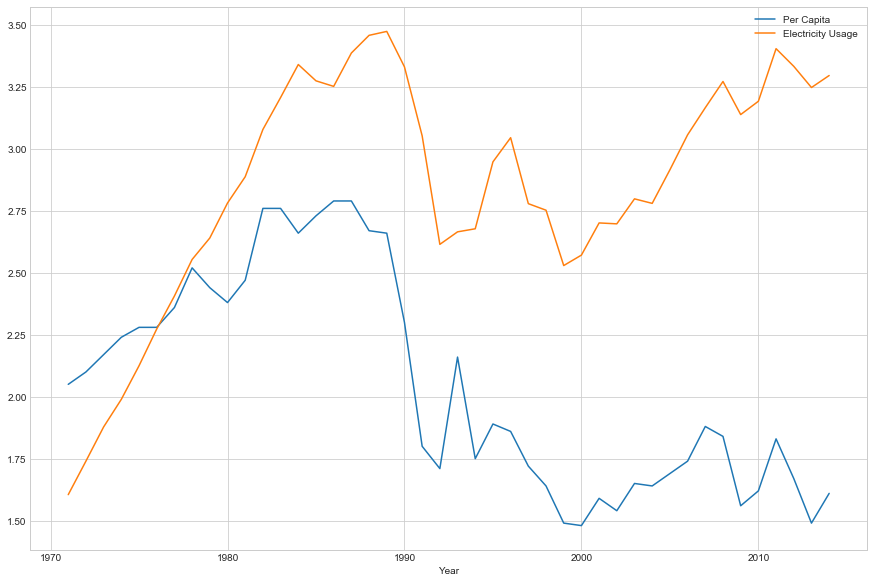

In [290]:
a= elec[elec['Country Name'] =='Bulgaria'].mean(axis=0).to_frame()
b= fuel_capita_growth['BULGARIA'].to_frame()
a.index.name = 'Year'
b.index.name = 'Year'
a.columns = ['Total Elec']
b = b.dropna()
a = a.dropna()
a['Year'] = a.index
b['Year'] = b.index
b = b.astype(float)
a = a.astype(float)
df_elec = pd.merge(a,b,how='inner')
df_elec['Electricity Usage'] = df_elec['Total Elec'] * 0.0007
df_elec = df_elec.iloc[:,1:4]
df_elec.set_index('Year').plot(figsize=(15,10))


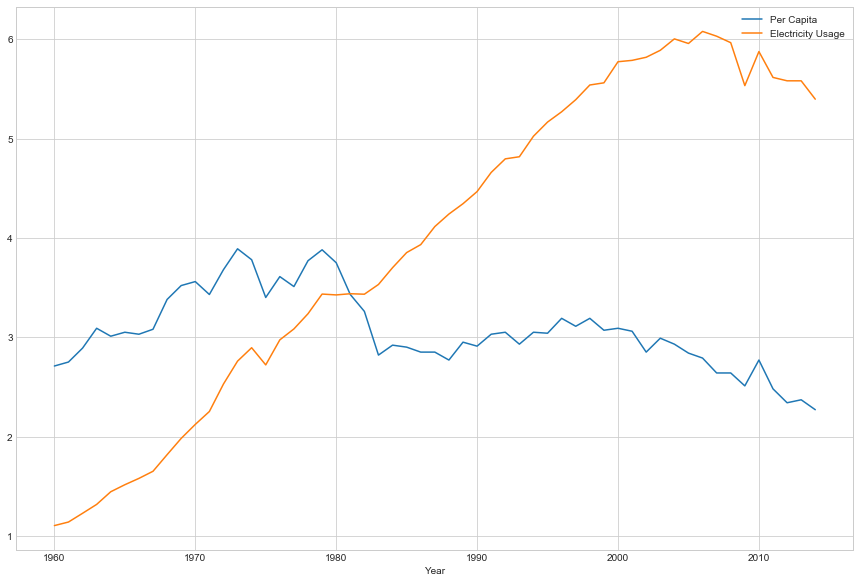

In [283]:
a= elec[elec['Country Name'] =='Belgium'].mean(axis=0).to_frame()
b= fuel_capita_growth['BELGIUM'].to_frame()
a.index.name = 'Year'
b.index.name = 'Year'
a.columns = ['Total Elec']
b = b.dropna()
a = a.dropna()
a['Year'] = a.index
b['Year'] = b.index
b = b.astype(float)
a = a.astype(float)
df_elec = pd.merge(a,b,how='inner')
df_elec['Electricity Usage'] = df_elec['Total Elec'] * 0.0007 #because 1 kwh is equal to 0.0007 metric ton Fuel
#source: https://www.epa.gov/energy/greenhouse-gas-equivalencies-calculator
df_elec = df_elec.iloc[:,1:4]
df_elec.set_index('Year').plot(figsize=(15,10))

In [19]:
raw.Country.unique()
        

array(['UNITED KINGDOM', 'CANADA', 'GERMANY', 'POLAND',
       'UNITED STATES OF AMERICA', 'BELGIUM', 'FRANCE (INCLUDING MONACO)',
       'AUSTRIA', 'NORWAY', 'HUNGARY', 'SPAIN', 'USSR', 'SWEDEN',
       'DENMARK', 'NETHERLANDS', 'IRELAND', 'AUSTRALIA', 'ROMANIA',
       'INDIA', 'SWITZERLAND', 'CZECHOSLOVAKIA', 'FINLAND',
       'ITALY (INCLUDING SAN MARINO)', 'TURKEY', 'GREECE',
       'JAPAN (EXCLUDING THE RUYUKU ISLANDS)', 'PORTUGAL', 'NEW ZEALAND',
       'BULGARIA', 'YUGOSLAVIA (FORMER SOCIALIST FEDERAL REPUBLIC)',
       'PERU', 'SOUTH AFRICA', 'ARGENTINA', 'INDONESIA',
       'PENINSULAR MALAYSIA', 'MEXICO', 'VIET NAM', 'CHILE', 'TAIWAN',
       'CHINA (MAINLAND)', 'ALGERIA', 'BRAZIL',
       'ISLAMIC REPUBLIC OF IRAN', 'ZIMBABWE', 'VENEZUELA',
       'UNITED KOREA', 'PHILIPPINES', 'TRINIDAD AND TOBAGO', 'EGYPT',
       'NIGERIA', 'TUNISIA', 'ECUADOR',
       'DEMOCRATIC REPUBLIC OF THE CONGO (FORMERLY ZAIRE)', 'PUERTO RICO',
       'COLOMBIA', 'IRAQ', 'SARAWAK', 'NETHERLAND AN

In [293]:
!jupyter nbconvert --post serve --to slides --reveal-prefix "MiniProject" MiniShow.ipynb

[NbConvertApp] WARNING | pattern 'MiniShow.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdout i

In [294]:
!ipython nbconvert --to slides MiniProject.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook MiniProject.ipynb to slides
[NbConvertApp] Writing 1029660 bytes to MiniProject.slides.html
